In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
df = pd.read_csv('data-features.csv')
df = df.sort_values(by='date')
df['date'] = df['date'].astype('datetime64')
df.tail()

,date,zip_code,start_station,end_station,duration,maxtemperaturef,meantemperaturef,precipitationin,cloudcover,events
32481,2016-08-31,94107,Market at 4th,San Francisco Caltrain (Townsend at 4th),354,72,66,0.0,4,NaN
32480,2016-08-31,94107,Embarcadero at Sansome,2nd at Townsend,989,72,66,0.0,4,NaN
32479,2016-08-31,94063,Park at Olive,San Antonio Shopping Center,1259,73,66,0.0,0,NaN
32492,2016-08-31,94107,2nd at South Park,Post at Kearny,358,72,66,0.0,4,NaN
32565,2016-08-31,94107,Commercial at Montgomery,2nd at Townsend,1008,72,66,0.0,4,NaN


In [133]:
#### features
features = pd.DataFrame()

features['rain'] = np.where((df['events'].isin(['Rain', False])), 1, 0)

features['Less than 5 hrs'] = np.where(df['duration'] <= 5*60, 1, 0)
features['one day or more'] = np.where(df['duration'] >= 24*60, 1, 0)
features['warm day'] = np.where(df['maxtemperaturef'] >= 70, 1, 0)

features['Need Sunscreen'] = np.where((df['meantemperaturef'] >= 65) & (df['cloudcover'] <= 2), 1, 0)

features['inverse_temperature'] = 1/(df['maxtemperaturef'])

features['log_duration'] = np.log(df['duration'])

features['raingear'] = np.where(df['precipitationin'] > 0.0, 1, 0)

features['summer'] = np.where((df['date'] >= '2015-09-01'), 1, 0)
features['fall'] = np.where((df['date'] >= '2015-09-22') & (df['date'] <= '2015-12-20') & (df['date'] >= '2016-06-21'), 1, 0)
features['winter'] = np.where((df['date'] >= '2015-12-21') & (df['date'] <= '2016-03-19'), 1, 0)
features['spring'] = np.where((df['date'] >= '2016-03-20') & (df['date'] <= '2016-06-20'), 1, 0)

features['day of week'] = df['date'].dt.dayofweek

features.head()

,rain,Less than 5 hrs,one day or more,warm day,Need Sunscreen,inverse_temperature,log_duration,raingear,summer,fall,winter,spring,day of week
0,0,0,0,1,1,0.015385,5.480639,0,1,0,0,0,2
1,0,1,0,1,1,0.015385,5.370638,0,1,0,0,0,2
2,0,1,0,1,1,0.015385,6.548219,0,1,0,0,0,2
3,0,0,0,1,1,0.015385,5.564520,0,1,0,0,0,2
4,0,0,0,1,1,0.015385,6.165418,0,1,0,0,0,2


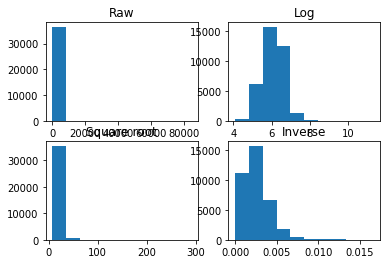

In [46]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['duration'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['duration'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['duration'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['duration'].dropna())
plt.title('Inverse')
plt.show()

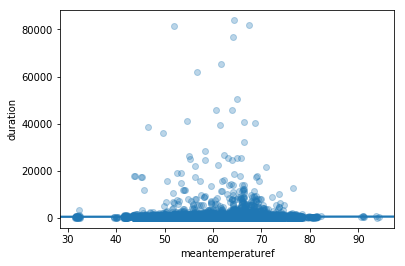

In [69]:
sns.regplot(df['meantemperaturef'], df['duration'], x_jitter= .49, y_jitter=.49, scatter_kws={'alpha':0.3})

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


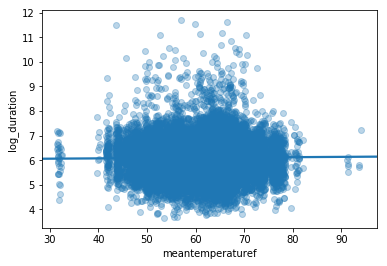

In [79]:
sns.regplot(df['meantemperaturef'], features['log_duration'], x_jitter= .49, y_jitter=.49, scatter_kws={'alpha':0.3})